# Boston Housing
**_Before you begin, understand the problem_**

Vamos tentar prever o preço de imóveis em Boston. Nossa tarefa será prever o preço mediano de uma vizinhança (y) a partir de variáveis X, tais como taxa de criminalidade na região, número médio de quartos, índice de pobreza…
-  Para mais informações sobre os dados, elas estão na [documentação do Scikit-Learn](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

## Imports

In [9]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Dataset
from sklearn.datasets import load_boston

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

## Prepare Principal Directory

In [10]:
import os


def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [11]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/artificial_inteligence/machine_learning/supervised_learning/linear_models/linear_regression/notebooks_and_examples'

## Cell Format

In [12]:
# hide_code
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data
- Colunas
    - **Country** – O país em que a pessoa nasceu.
    - **Life expectancy** – A expectativa de vida média ao nascer para uma pessoa nesse país.
    - **BMI** – O IMC médio para homens nesse país

In [13]:
%%time

boston_dataset = load_boston()
X = boston_dataset['data']
y = boston_dataset['target']

CPU times: user 10 ms, sys: 977 µs, total: 11 ms
Wall time: 8.06 ms


In [14]:
type(boston_dataset)

sklearn.utils.Bunch

In [15]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33


In [17]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## new column of target

In [18]:
df_boston['MEDV'] = boston_dataset.target

## Missing Values

In [19]:
df_boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## Exploratory Data Analysis

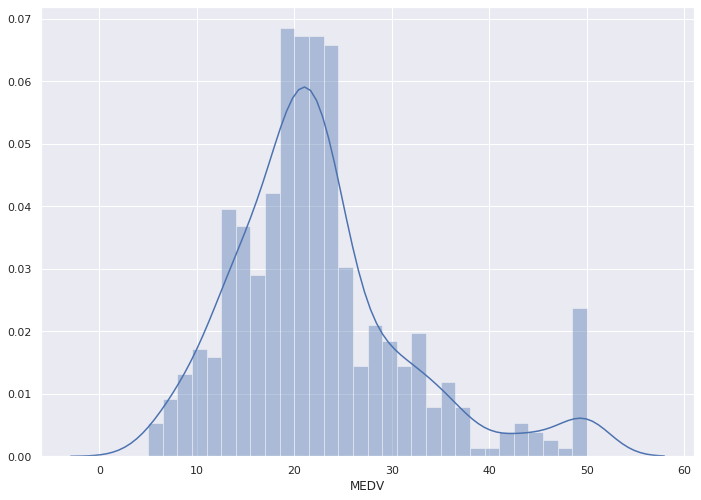

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['MEDV'], bins=30)
plt.show()

MEDV are distributed normally with few outliers.

---

## Prepare Tranning

In [21]:
house_data = load_boston()
X = house_data['data']
y = house_data['target']

## Split Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## Create Model

In [23]:
model_lr = LinearRegression()

## Train Model

In [24]:
model_lr = model_lr.fit(X_train, y_train)

Finalmente, com o modelo treinado, podemos realizar previsões e ver quão próximas elas estão da realidade.

Podemos fazer previsões com os **dados de teste** ou senão com algum valor do eixo X (IMC).

## Model Evaluation

In [25]:
y_train_predict = model_lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for TRAINING set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model_lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for TESTING set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for TRAINING set
--------------------------------------
RMSE is 4.4674623461466405
R2 score is 0.7645451026942549


The model performance for TESTING set
--------------------------------------
RMSE is 5.214975145375423
R2 score is 0.6733825506400171


## Note
The model explain 71% of variables house price !

---